In [2]:
import cv2 as cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import matplotlib.patches as patches
from PIL import Image
import io

#For Blob
from azure.storage.blob import BlobServiceClient, ContainerClient

In [3]:
#Add the Azure Blob Storage Details if required

In [4]:
blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)

container_client = blob_service_client.get_container_client(container_name)
blobs = container_client.list_blobs()
blob_contents = {}

In [5]:
blobs = container_client.list_blobs()
# for blob in blobs:
#     print(blob.name)

In [15]:
blob_name = "hidden_path/8808.jpg"
blob_client = container_client.get_blob_client(blob_name)
blob_data = blob_client.download_blob()
content = blob_data.readall()
print(type(content))

<class 'bytes'>


In [16]:
selected_image_np = np.asarray(bytearray(content), dtype=np.uint8)
selected_image = cv2.imdecode(selected_image_np, cv2.IMREAD_COLOR)

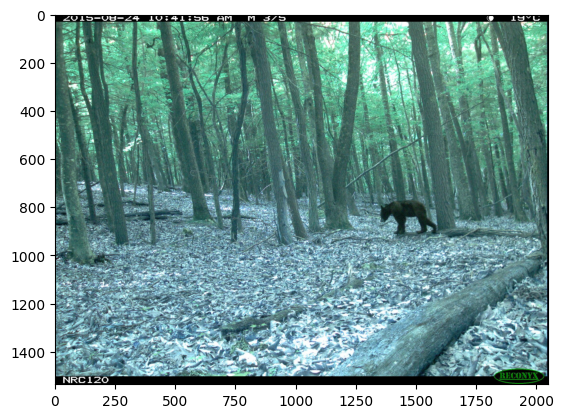

In [17]:
plt.imshow(selected_image)
plt.show()

In [18]:
json_file_path = "hidden_path/Metadata.json"
blob_client = container_client.get_blob_client(json_file_path)
blob_content = blob_client.download_blob().readall()
json_data = json.loads(blob_content)

In [10]:
annotations = json_data['annotations']

In [19]:
target_annotation = next((annotation for annotation in annotations if annotation['image_id'] == '8808'), None)

In [20]:
bbox = target_annotation['bbox']

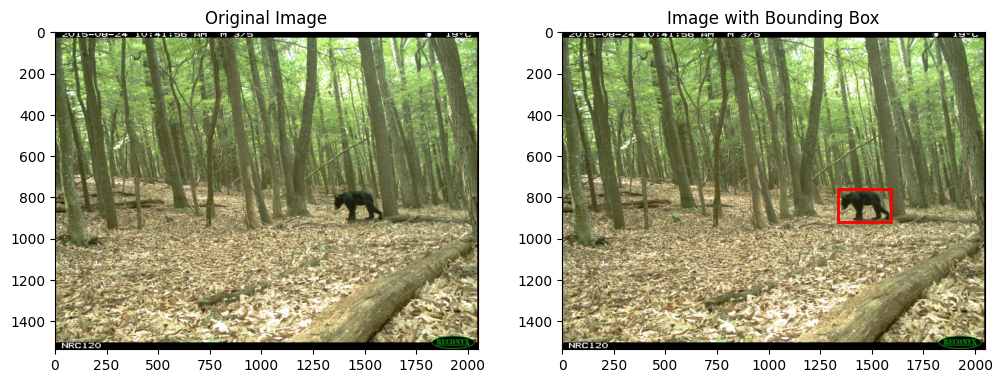

In [21]:
#Displaying the Image with and without Bounding Box

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.title('Image with Bounding Box')

plt.show()

In [22]:
print(f"Shape: {selected_image.shape}")
print(f"Minimum Pixel Value: {selected_image.min()}")
print(f"Maximum Pixel Value: {selected_image.max()}")
print(f"Mean Pixel Value: {selected_image.mean()}")
print(f"Standard Deviation: {selected_image.std()}")
print()

Shape: (1536, 2048, 3)
Minimum Pixel Value: 0
Maximum Pixel Value: 255
Mean Pixel Value: 122.57007884979248
Standard Deviation: 56.52859744228946



Error processing image: UI/2024-01-14_081029_UTC/Metadata.json, cannot identify image file <_io.BytesIO object at 0x7fbfe145d770>
Error processing image: azureml/33277877-96e5-43a4-89e1-d59c462a27f8/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfe14e8e00>
Error processing image: azureml/a2ca175e-1352-4632-bd8c-a846a288fd43/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfe13831d0>
Error processing image: azureml/cafa17bc-29b1-45bf-a678-ad5eb3f823ad/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfe13d9ae0>
Error processing image: azureml/f6fb75ae-b748-4184-9705-a24dffa724fc/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfe142e950>
Error processing image: azureml/febbc703-8420-4096-9662-1f47e917d3b6/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfe13bfd60>


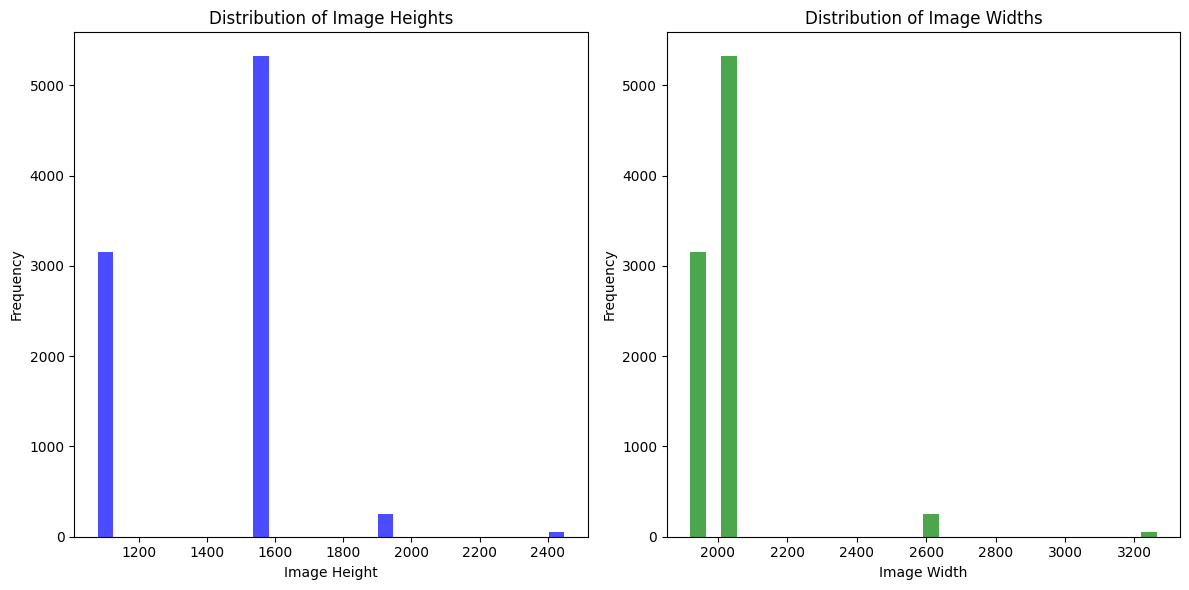

Average Height: 1389.73
Average Width: 2025.41


In [19]:
# Initialize lists to store image dimensions
heights = []
widths = []

# Iterate through the images in the dataset
for blob in container_client.list_blobs():
    blob_name = blob.name
    blob_client = container_client.get_blob_client(blob_name)
    
    try:
        blob_data = blob_client.download_blob()
        content = blob_data.readall()

        # Load the image using PIL
        img = Image.open(io.BytesIO(content)).convert("RGB")

        # Extract image dimensions
        img_width, img_height = img.size

        # Append dimensions to the lists
        heights.append(img_height)
        widths.append(img_width)
    except Exception as e:
        print(f"Error processing image: {blob_name}, {e}")

# Calculate average height and width
avg_height = sum(heights) / len(heights)
avg_width = sum(widths) / len(widths)

# Create histograms to visualize distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(heights, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Image Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Image Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print average height and width
print(f"Average Height: {avg_height:.2f}")
print(f"Average Width: {avg_width:.2f}")

Error processing image: UI/2024-01-14_081029_UTC/Metadata.json, cannot identify image file <_io.BytesIO object at 0x7fbfd84c7cc0>
Error processing image: azureml/33277877-96e5-43a4-89e1-d59c462a27f8/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd853b310>
Error processing image: azureml/a2ca175e-1352-4632-bd8c-a846a288fd43/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd8554900>
Error processing image: azureml/cafa17bc-29b1-45bf-a678-ad5eb3f823ad/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd8547cc0>
Error processing image: azureml/f6fb75ae-b748-4184-9705-a24dffa724fc/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd85e6180>
Error processing image: azureml/febbc703-8420-4096-9662-1f47e917d3b6/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd85f2310>


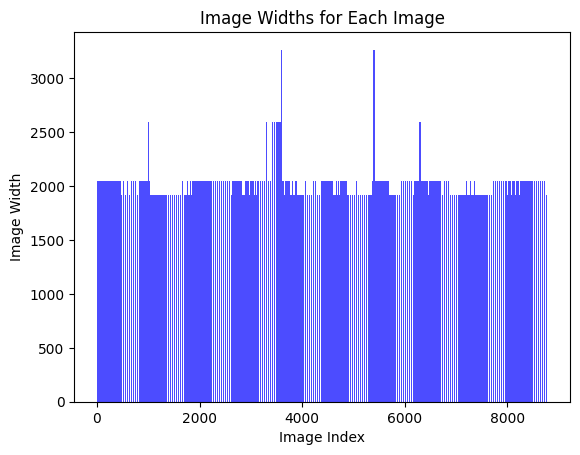

In [17]:
widths = []

# Iterate through the images in the dataset
for blob in container_client.list_blobs():
    blob_name = blob.name
    blob_client = container_client.get_blob_client(blob_name)
    
    try:
        blob_data = blob_client.download_blob()
        content = blob_data.readall()

        # Load the image using PIL
        img = Image.open(io.BytesIO(content))

        # Extract image width
        img_width = img.size[0]

        # Append width to the list
        widths.append(img_width)
    except Exception as e:
        print(f"Error processing image: {blob_name}, {e}")

# Create a bar chart for each image width without displaying image names
plt.bar(range(len(widths)), widths, color='blue', alpha=0.7)
plt.title('Image Widths for Each Image')
plt.xlabel('Image Index')
plt.ylabel('Image Width')
plt.show()

Error processing image: UI/2024-01-14_081029_UTC/Metadata.json, cannot identify image file <_io.BytesIO object at 0x7fbfd9cb1ae0>
Error processing image: azureml/33277877-96e5-43a4-89e1-d59c462a27f8/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd9c13bd0>
Error processing image: azureml/a2ca175e-1352-4632-bd8c-a846a288fd43/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd9cf5c20>
Error processing image: azureml/cafa17bc-29b1-45bf-a678-ad5eb3f823ad/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd9ce9e00>
Error processing image: azureml/f6fb75ae-b748-4184-9705-a24dffa724fc/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd9c63360>
Error processing image: azureml/febbc703-8420-4096-9662-1f47e917d3b6/extensions/hadoop-azureml-fs.jar, cannot identify image file <_io.BytesIO object at 0x7fbfd9cd1900>


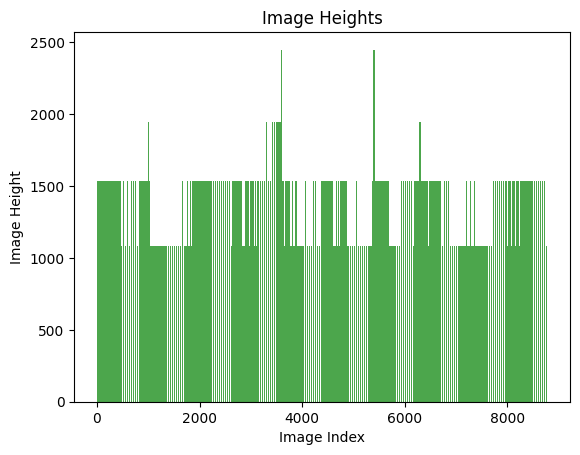

In [18]:
heights = []

# Iterate through the images in the dataset
for blob in container_client.list_blobs():
    blob_name = blob.name
    blob_client = container_client.get_blob_client(blob_name)
    
    try:
        blob_data = blob_client.download_blob()
        content = blob_data.readall()

        # Load the image using PIL
        img = Image.open(io.BytesIO(content))

        # Extract image width
        img_height = img.size[1]

        # Append width to the list
        heights.append(img_height)
    except Exception as e:
        print(f"Error processing image: {blob_name}, {e}")

# Create a bar chart for each image width without displaying image names
plt.bar(range(len(heights)), heights, color='green', alpha=0.7)
plt.title('Image Heights')
plt.xlabel('Image Index')
plt.ylabel('Image Height')
plt.show()